In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [6]:
col = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.data', names=col)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data[['class']].value_counts()

class
0        500
1        268
Name: count, dtype: int64

In [8]:
#sns.pairplot(data = data, diag_kind = 'kde' )
#plt.show()

In [9]:
X = data.drop('class', axis=1)
y = data['class']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [12]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
for idx, col_name in enumerate(X_train.columns):
    print(f" The coefficient for {col_name} is {model.coef_[0][idx]}")

 The coefficient for preg is 0.10143103471877984
 The coefficient for plas is 0.03358644547310639
 The coefficient for pres is -0.015710845972886002
 The coefficient for skin is -0.0013475817175609022
 The coefficient for test is -0.0006974511101968079
 The coefficient for mass is 0.08943416715852869
 The coefficient for pedi is 0.5604876748766534
 The coefficient for age is 0.017057667251076675


In [14]:
model.intercept_[0]

-7.868231827680664

In [15]:
y_predict = model.predict(X_test)

In [16]:
model.score(X_test,y_test)

0.7835497835497836

In [17]:
confusion_matrix(y_test,y_predict)

array([[132,  14],
       [ 36,  49]], dtype=int64)

In [23]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

In [28]:
pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':threshold})

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.000000,0.011765,0.981154
2,0.000000,0.223529,0.780612
3,0.006849,0.223529,0.778346
4,0.006849,0.235294,0.756281
...,...,...,...
65,0.972603,0.976471,0.023363
66,0.972603,0.988235,0.022130
67,0.986301,0.988235,0.015655
68,0.986301,1.000000,0.015229


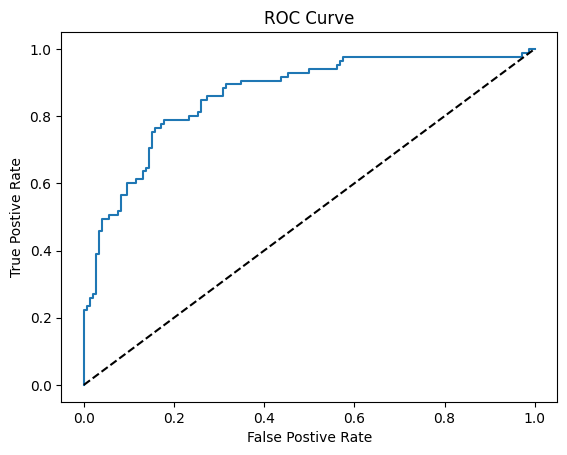

In [32]:
# Plotting ROC Curve
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.show()

In [35]:
# Calculating AUC for above curve
print('AUC =',auc(fpr, tpr))
print('AUC =',roc_auc_score(y_test, y_pred_proba))

AUC = 0.8632554391619661
AUC = 0.8632554391619661
